# Introduction to SunPy

In this tutorial we will use SunPy and other scientific packages in python to perform solar data analysis.


First we install all the required packages for this tutorial

In [ ]:
# install sunpy - the module required for the data analysis
%pip install -r https://raw.githubusercontent.com/slyardley/standrews/refs/heads/main/requirements1.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.8/959.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.4/92.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.0/181.0

In [ ]:
# import all of the packages from sunpy, astropy and matplotlib
from sunpy.net import Fido, attrs as a
import sunpy.map
from sunpy.time import parse_time
import sunpy.timeseries
import sunpy.data.sample
from sunpy.coordinates import frames, get_horizons_coord, get_body_heliographic_stonyhurst
from sunpy.coordinates import SphericalScreen

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.net import vso
from sunpy.time import parse_time
import glob
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sunpy.coordinates import Helioprojective, propagate_with_solar_surface
from astropy.wcs import WCS
import matplotlib.colors

from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import sunpy.timeseries as ts
from sunpy.time import TimeRange

# Astropy Units

Astropy units (imported as `astropy.units` as u) allows us to deal with quantities that have a physical unit e.g. km/s

We can use astropy.units to convert between units



In [ ]:
distance_km = 725*u.km

In [ ]:
distance_km

<Quantity 725. km>

In [ ]:
distance_km.value

725.0

We can convert the distance in km to metres and even to parsec (parsec is a unit of length used to measure the large distances to astronomical objects outside the Solar System)

In [ ]:
distance_km.to(u.m)

<Quantity 725000. m>

In [ ]:
distance_km.to(u.pc)

<Quantity 2.34956498e-11 pc>

In [ ]:
distance_km.cgs

<Quantity 72500000. cm>

In [ ]:
time_sec = 60*u.s
distance_km/time_sec

<Quantity 12.08333333 km / s>

# Coordinate Frames and SkyCoord

SunPy uses `astropy.coordinates` so that we are able to plot points in 3D space. SunPy builds upon astropy.coordinates as it has specific solar coordinate frames and transformations between frames

To represent astropy coordinates we use SkyCoord (which makes use of `astropy.units`). A SkyCoord object is created by passing the positions of the points with units and coordinate frame.

Examples of coordinate frames frequently used in solar physics are
Helioprojective, Heliographic Stonyhurst and Heliocentric.

Coordinate systems for solar image data: https://www.aanda.org/articles/aa/pdf/2006/14/aa4262-05.pdf


In [ ]:
hpc_coord = SkyCoord(250*u.arcsec, 250*u.arcsec, obstime="2022-03-03", observer="earth",
                 frame=frames.Helioprojective)

In [ ]:
hpc_coord

<SkyCoord (Helioprojective: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (250., 250.)>

In [ ]:
hpc_coord.transform_to(frames.HeliographicStonyhurst)

<SkyCoord (HeliographicStonyhurst: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (15.0512931, 7.92121855, 0.00465047)>

Note that coordinate systems are often dependent on the observer location so you need to include this in the SkyCoord object

In [ ]:
hpc = SkyCoord(0*u.arcsec, 0*u.arcsec, observer="earth",
                obstime="2022-03-03",
                frame=frames.Helioprojective)

In [ ]:
hpc

<SkyCoord (Helioprojective: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (0., 0.)>

In [ ]:
hpc.transform_to(frames.Helioprojective(observer="mars"))

<SkyCoord (Helioprojective: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'mars'>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    (-624.63608996, -81.3048119, 1.45968498)>

In [ ]:
hpc.transform_to(frames.Helioprojective(observer="jupiter"))

<SkyCoord (Helioprojective: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'jupiter'>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    (7.96215967, -3.90524142, 4.98522772)>

In [ ]:
solo_coord = get_horizons_coord("solo", "2022-03-03")

INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144)


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


In [ ]:
hpc.transform_to(frames.Helioprojective(observer=solo_coord))

<SkyCoord (Helioprojective: obstime=2022-03-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-03-03T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-6.56981386, -4.12508966, 0.55181584)>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    (198.96568733, -95.98580085, 0.54720276)>

# Download data using Fido

We can use SunPy's Fido to search and download data for solar physics. It can search and download different datasets from multiple sources in a single query.

More information about Fido can be found here: https://docs.sunpy.org/en/stable/tutorial/acquiring_data/index.html





In [ ]:
Fido

<sunpy.net.fido_factory.UnifiedDownloaderFactory object at 0x7f83f8b67850>
sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
ADAPTClient       ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...

To search data using Fido we use the following attributes:

* `a.Time`
* `a.Instrument`
* `a.Wavelength`
* `a.Sample`

In [ ]:
a.Time("2017-09-04", "2017-09-07")

<sunpy.net.attrs.Time(2017-09-04 00:00:00.000, 2017-09-07 00:00:00.000)>

In [ ]:
a.Instrument.aia

<sunpy.net.attrs.Instrument(AIA: Atmospheric Imaging Assembly) object at 0x7f842ccca810>

In [ ]:
a.Wavelength(193*u.angstrom)

<sunpy.net.attrs.Wavelength(193.0, 193.0, 'Angstrom')>

Lets search for some data from the AIA instrument over a specific time period

In [ ]:
result = Fido.search(a.Time("2017-09-04 12:00", "2017-09-06 12:00"),
                     a.Instrument("AIA"),
                     a.Wavelength(171*u.angstrom))

In [ ]:
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f83ef0d1e50>
Results from 1 Provider:

289 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Total estimated size: 969.99 Gbyte

       Start Time               End Time        Source ... Extent Type    Size    Extra Flags
                                                       ...               Mibyte              
----------------------- ----------------------- ------ ... ----------- ---------- -----------
2017-09-04 12:00:09.000 2017-09-04 12:09:22.000    SDO ...    FULLDISK 3038.47656           S
2017-09-04 12:09:33.000 2017-09-04 12:19:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 12:19:33.000 2017-09-04 12:29:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 12:29:33.000 2017-09-04 12:39:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 12:39:33.000 2017-09-04 12:49:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 12:49:33.000 2017-09-04 12:59:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 12:59:33.000 2017-09-04 13:09:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 13:09:33.000 2017-09-04 13:19:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-04 13:19:33.000 2017-09-04 13:29:22.000    SDO ...    FULLDISK 3232.42188           S
                    ...                     ...    ... ...         ...        ...         ...
2017-09-06 10:29:33.000 2017-09-06 10:39:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 10:39:33.000 2017-09-06 10:49:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 10:49:33.000 2017-09-06 10:59:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 10:59:33.000 2017-09-06 11:09:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:09:33.000 2017-09-06 11:19:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:19:33.000 2017-09-06 11:29:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:29:33.000 2017-09-06 11:39:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:39:33.000 2017-09-06 11:49:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:49:33.000 2017-09-06 11:59:22.000    SDO ...    FULLDISK 3232.42188           S
2017-09-06 11:59:33.000 2017-09-06 11:59:58.000    SDO ...    FULLDISK  193.94531           S
Length = 289 rows

In [ ]:
result[0][0]

<QueryResponseRow index=0>
       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type    Size    Extra Flags                fileid              
                                                                     Angstrom                                                                         Mibyte                                                  
          Time                    Time           str3     str3      float64[2]     str4      str9     str6       str4          str4         str8     float64       str1                   str35               
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- ---------- ----------- -----------------------------------
2017-09-04 12:00:09.000 2017-09-04 12:09:22.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 3038.47656           S aia__lev1:171:1283601647:1283602199

In [ ]:
result[0][2]

<QueryResponseRow index=2>
       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type    Size    Extra Flags                fileid              
                                                                     Angstrom                                                                         Mibyte                                                  
          Time                    Time           str3     str3      float64[2]     str4      str9     str6       str4          str4         str8     float64       str1                   str35               
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- ---------- ----------- -----------------------------------
2017-09-04 12:19:33.000 2017-09-04 12:29:22.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 3232.42188           S aia__lev1:171:1283602811:1283603399

In [ ]:
result = Fido.search(a.Time("2017-09-06 12:00", "2017-09-06 13:00"),
                     a.Instrument("AIA"),
                     a.Wavelength(171*u.angstrom),
                     a.Sample(1*u.hour))

In [ ]:
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f83f0727210>
Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source ... Extent Length Extent Type   Size  
                                                       ...                            Mibyte 
----------------------- ----------------------- ------ ... ------------- ----------- --------
2017-09-06 12:00:09.000 2017-09-06 12:00:10.000    SDO ...          4096    FULLDISK 64.64844

Ok, so now we have explored the attributes lets download some data! You can do this using the following steps:

* Search for the data using `Fido.search` and restrict your queries using the attributes
* Download the queried data using `Fido.fetch`





We are now going to download multiple files at once in a single Fido query

In [ ]:
combined_res = Fido.search(a.Time("2017-09-06 12:00", "2017-09-06 12:00:15"),
                       (a.Instrument.aia) | (a.Instrument.hmi))

In [ ]:
combined_res

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f83f21e1150>
Results from 1 Provider:

10 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Total estimated size: 677.888 Mbyte

       Start Time               End Time        Source ... Extent Length Extent Type   Size  
                                                       ...                            Mibyte 
----------------------- ----------------------- ------ ... ------------- ----------- --------
2017-09-06 12:00:00.000 2017-09-06 12:00:01.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:05.000 2017-09-06 12:00:06.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:07.000 2017-09-06 12:00:08.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:08.000 2017-09-06 12:00:09.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:09.000 2017-09-06 12:00:10.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:10.000 2017-09-06 12:00:11.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:12.000 2017-09-06 12:00:13.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:13.000 2017-09-06 12:00:14.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:14.000 2017-09-06 12:00:15.000    SDO ...          4096    FULLDISK 64.64844
2017-09-06 12:00:14.000 2017-09-06 12:00:15.000    SDO ...          4096    FULLDISK 64.64844

In [ ]:
download_results = Fido.fetch(combined_res, path="./{instrument}/{file}")

Files Downloaded:   0%|          | 0/10 [00:00<?, ?file/s]

aia.lev1.193A_2017_09_06T12_00_07.53Z.image_lev1.fits:   0%|          | 0.00/7.00M [00:00<?, ?B/s]

5/0 files failed to download. Please check `.errors` for details


# Failure to download files
Unfortunately, the server room of JSOC is flooded and so we can't download the files directly.

Instead you can use your google drive directly if you have one (see below) or you can download the files from the following link: https://drive.google.com/drive/folders/1pAHKt9VVxDW3r2l0imwSKwMi9WMb-tWq?usp=drive_link

Then you can upload them by clicking the folder button, followed by the upload file button.

In [ ]:
# Run this if you can use google
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [46]:
# If you have uploaded the files directly
aia_files = glob.glob('aia*.fits')

In [ ]:
# If you are using google
aia_files = glob.glob('/content/drive/MyDrive/standrews/practical1/AIA/aia*.fits')

In [47]:
# Sort the files in order
aia_files.sort()

In [48]:
aia_files

['aia.lev1.094.967607768.2017-09-04T12_00_47.121Z.image_lev1.fits',
 'aia.lev1.131.967607765.2017-09-04T12_00_42.621Z.image_lev1.fits',
 'aia.lev1.171.967607722.2017-09-04T12_00_09.346Z.image_lev1.fits',
 'aia.lev1.193.967607693.2017-09-04T12_00_06.615Z.image_lev1.fits',
 'aia.lev1.211.967607731.2017-09-04T12_00_21.625Z.image_lev1.fits',
 'aia.lev1.304.967607720.2017-09-04T12_00_05.141Z.image_lev1.fits',
 'aia.lev1.335.967607725.2017-09-04T12_00_12.625Z.image_lev1.fits']

In [49]:
aia_files[0]

'aia.lev1.094.967607768.2017-09-04T12_00_47.121Z.image_lev1.fits'

In [50]:
# Make a map using sunpy.map of the first file in the list
aia_94 = sunpy.map.Map(aia_files[0])

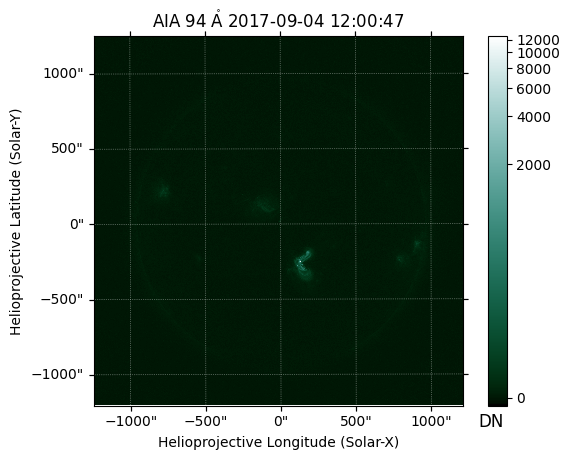

In [51]:
# Lets take a look - its an image of the Sun in 94 Angstrom taken by the Solar Dynamics Observatory
aia_94.peek()

In [52]:
#Lets choose the second file in the list and make a map
aia_171 = sunpy.map.Map(aia_files[2])

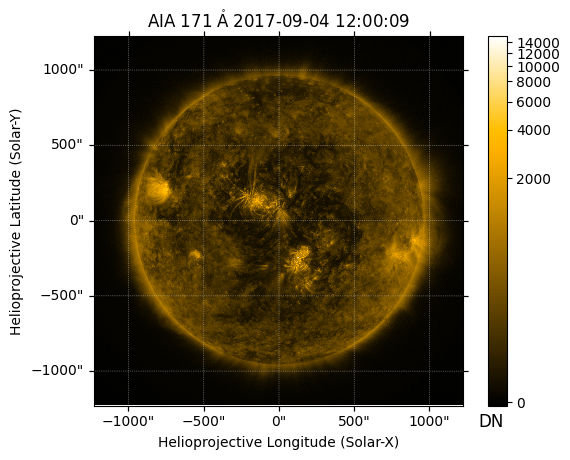

In [54]:
# Take a quick look and you will see this is the Sun in a different wavelength (171 Angstrom)
aia_171.peek()

In [55]:
# Lets try another...
aia_304 = sunpy.map.Map(aia_files[5])

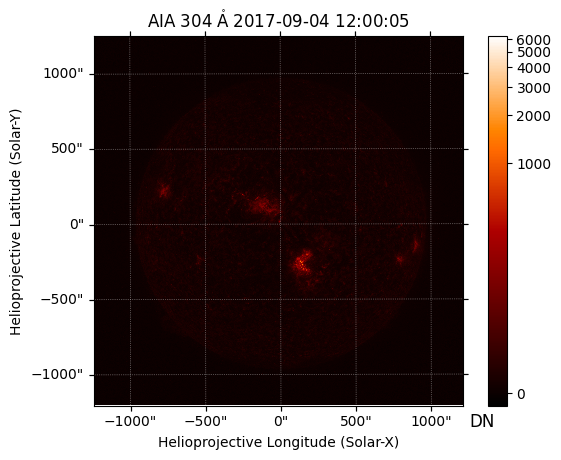

In [56]:
aia_304.peek()

# Lets explore the map structure

In this section you will learn about map objects.

Map objects hold 2D data along with the accompanying metadata. The main reason to use a map object is the ability to perform coordinate transforms on the underlying data array e.g. rotate the map, crop the map (as we will see later on). A map object is very useful as can take data from many different sources or instruments.


<sunpy.map.sources.sdo.AIAMap object at 0x7d421ee3d2a0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2017-09-04 12:00:09
Exposure Time:		 2.000172 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.599489 0.599489] arcsec / pix
Reference Pixel:	 [2051.699951 2048.780029] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 2.,  1.,  0., ...,  0., -2., -2.],
       [ 2.,  0., -2., ...,  0., -1., -3.],
       [ 0.,  0.,  0., ..., -2., -1., -2.],
       ...,
       [-2.,  0.,  0., ..., -2., -2.,  1.],
       [-1.,  2.,  0., ..., -3., -1.,  0.],
       [-2., -1.,  1., ...,  1.,  1., -1.]], dtype=float32)
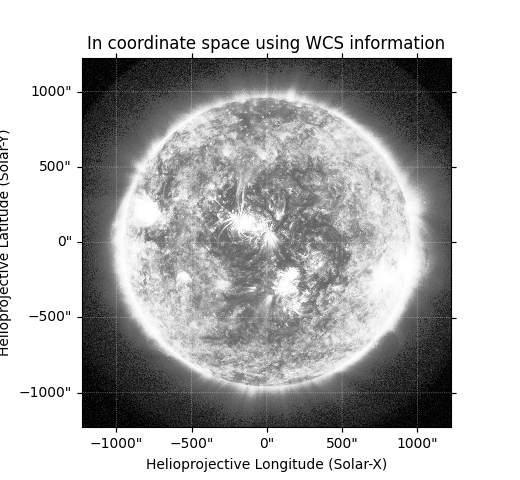
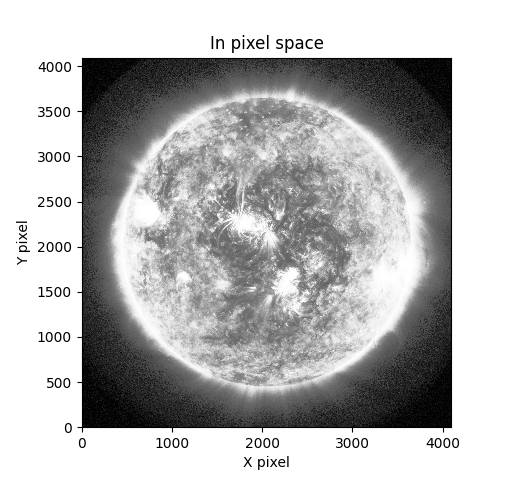
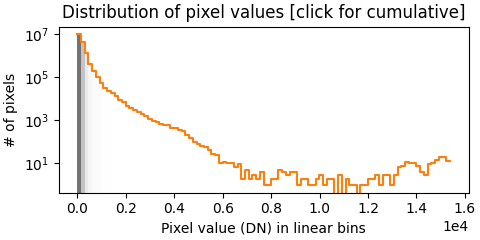
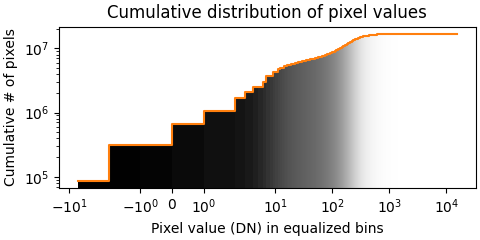

In [ ]:
# Take a look at the structure of the map
aia_171

In [57]:
# Time the image was taken
aia_171.date

<Time object: scale='utc' format='isot' value=2017-09-04T12:00:09.350>

In [ ]:
# Exposure time of the detector
aia_171.exposure_time

<Quantity 2.000172 s>

In [ ]:
# Take a look at the data inside
aia_171.data

array([[ 2.,  1.,  0., ...,  0., -2., -2.],
       [ 2.,  0., -2., ...,  0., -1., -3.],
       [ 0.,  0.,  0., ..., -2., -1., -2.],
       ...,
       [-2.,  0.,  0., ..., -2., -2.,  1.],
       [-1.,  2.,  0., ..., -3., -1.,  0.],
       [-2., -1.,  1., ...,  1.,  1., -1.]], dtype=float32)

In [ ]:
# Dimensions of the data
aia_171.dimensions

PixelPair(x=<Quantity 4096. pix>, y=<Quantity 4096. pix>)

In [ ]:
# Print the minimum, maximum and mean value of the data
print('min value =', aia_171.min(), 'max value =', aia_171.max(), 'mean value =', aia_171.mean())

min value = -7.0 max value = 15383.0 mean value = 149.53339


In [ ]:
# What coordinate frame is the data in?
aia_171.coordinate_frame

<Helioprojective Frame (obstime=2017-09-04T12:00:10.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-09-04T12:00:10.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01028622, 7.2238292, 1.50857536e+11)>)>

In [ ]:
# What is the coordinate of the observer (i.e. us here on Earth)
aia_171.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2017-09-04T12:00:10.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01028622, 7.2238292, 1.50857536e+11)>

In [ ]:
# Center coordinates of the map
aia_171.center

<SkyCoord (Helioprojective: obstime=2017-09-04T12:00:10.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-09-04T12:00:10.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01028622, 7.2238292, 1.50857536e+11)>): (Tx, Ty) in arcsec
    (-2.51756636, -0.76820954)>

In [ ]:
# bottom left coordinatea of the map
aia_171.bottom_left_coord

<SkyCoord (Helioprojective: obstime=2017-09-04T12:00:10.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-09-04T12:00:10.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01028622, 7.2238292, 1.50857536e+11)>): (Tx, Ty) in arcsec
    (-1229.54409476, -1228.59807521)>

In [ ]:
# top right coordinates of the map
aia_171.top_right_coord

<SkyCoord (Helioprojective: obstime=2017-09-04T12:00:10.350, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2017-09-04T12:00:10.350, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.01028622, 7.2238292, 1.50857536e+11)>): (Tx, Ty) in arcsec
    (1224.50914022, 1227.06191604)>

Now that we have explored Map Objects lets plot them...

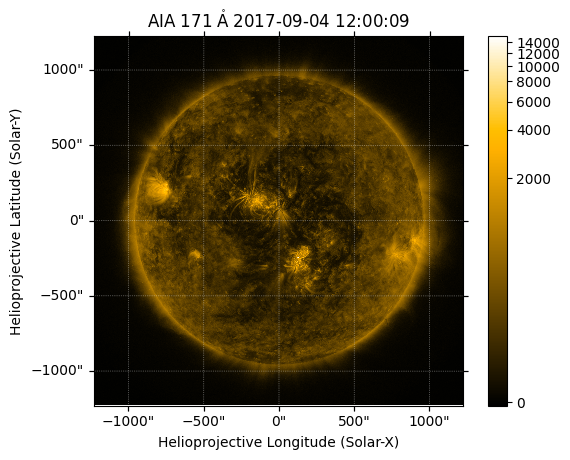

In [ ]:
# Lets plot a figure - first set up the figure
fig = plt.figure()
# add a subplot with the same projection as the map - good if you want to plot multiple things
ax = fig.add_subplot(projection=aia_171)
#plot the map
aia_171.plot(axes=ax)
# plot the colourbar at the side
plt.colorbar()
# Show the plot
plt.show()


# What do you notice?

The title and colormap are set by sunpy based upon the instrument and wavelength. Labels are based on the coordinate system of the map (Helioprojective)

The image is a bit dim, we can fix this using the clip_interval keyword to adjust the limit of the colorbar. We will clip out the dimmest 1% and the brightest 0.5% of pixels.


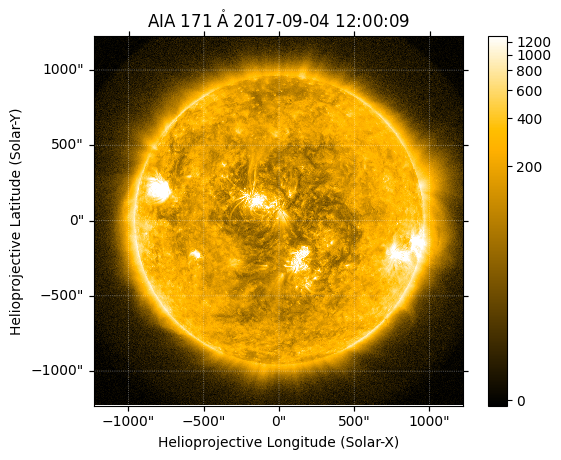

In [ ]:
# Lets make the same plot again but adjust the minimum and maximum values of the colourbar
fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, clip_interval=(1, 99.5)*u.percent)
plt.colorbar()
plt.show()

# Changing the colormap

Lets look at the default colormap assigned to AIA 171 first:

In [ ]:
# We can look at the colourmap applied to the image
aia_171.cmap.name

'sdoaia171'

We can change the colormap as follows...

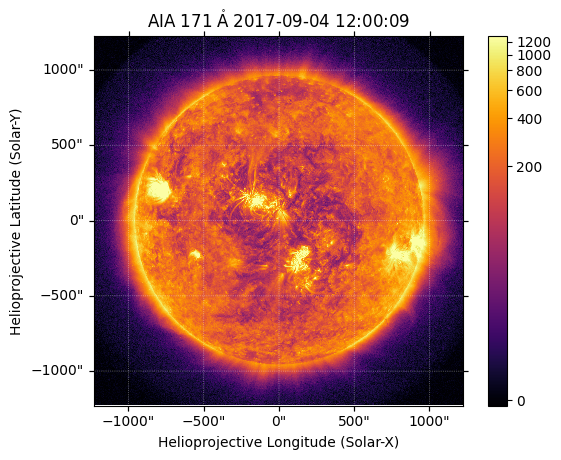

In [ ]:
# We can change the colourmap by using cmap =

fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, cmap='inferno', clip_interval=(1,99.5)*u.percent)
plt.colorbar()
plt.show()

You can find other colormaps here by using `list(colormaps)`.

Go ahead and find another colormap for the above plot!

# Contours and plotting points

When plotting images of the Sun we often want to highlight certain features or plot points. We can do this in a variety of ways including drawing contours around the brightest pixels in the image:

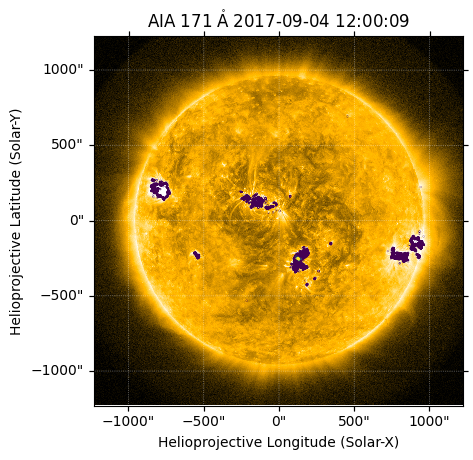

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, clip_interval=(1,99.5)*u.percent)
# we can draw contours on the plot
aia_171.draw_contours([10, 50, 90] * u.percent, axes=ax)
plt.show()

See how contours are drawn around the brightest regions on the Sun?

We can also draw the solar limb (i.e. the edge of the visible side of the Sun)

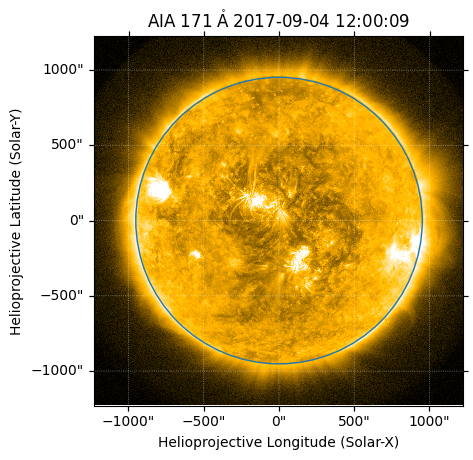

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, clip_interval=(1,99.5)*u.percent)
# We can draw the limb or edge of the Sun on the plot
aia_171.draw_limb(axes=ax, color='C0')
plt.show()

We can also plot a box that surrounds a region of interest:

/usr/local/lib/python3.10/dist-packages/astropy/visualization/wcsaxes/patches.py:196: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  super().__init__(vertices, **kwargs)


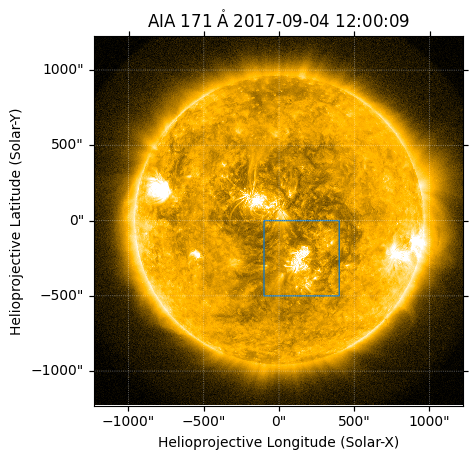

In [ ]:
# define the bottom left coordinates of the image
roi_bottom_left = SkyCoord(Tx=-100*u.arcsec, Ty=-500*u.arcsec, frame=aia_171.coordinate_frame)
# define the top right coordinates of the image
roi_top_right = SkyCoord(Tx=400*u.arcsec, Ty=0*u.arcsec, frame=aia_171.coordinate_frame)

# plot the map again
fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, clip_interval=(1,99.5)*u.percent)
# draw a box using the coordinates above
aia_171.draw_quadrangle(roi_bottom_left, top_right=roi_top_right, axes=ax, color='C0')
plt.show()


Try moving the box around to highlight another bright region on the Sun

Now lets plot some points on the image

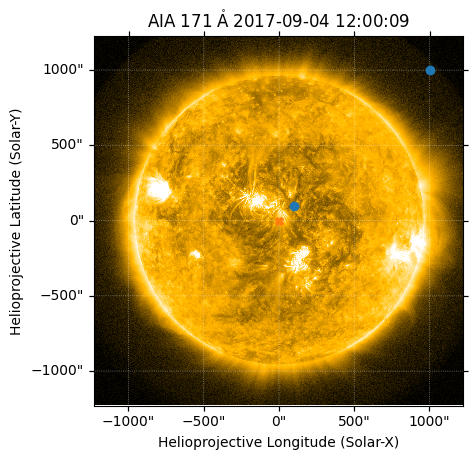

In [ ]:
# define the coordinates of a point to plot on the image
coords = SkyCoord(Tx=[100,1000] * u.arcsec, Ty=[100,1000] * u.arcsec, frame=aia_171.coordinate_frame)

# Plot the image again
fig = plt.figure()
ax = fig.add_subplot(projection=aia_171)
aia_171.plot(axes=ax, clip_interval=(1,99.5)*u.percent)
# use plot_coords to plot the coordinates on the image
ax.plot_coord(coords, 'o')
# plot the center coordinates of the map on the image
ax.plot_coord(aia_171.center, 'X')
plt.show()


Lets now plot all of the maps next to each other using subplots:

In [ ]:
# put all of the files in a map structure
aia_maps = sunpy.map.Map(aia_files)

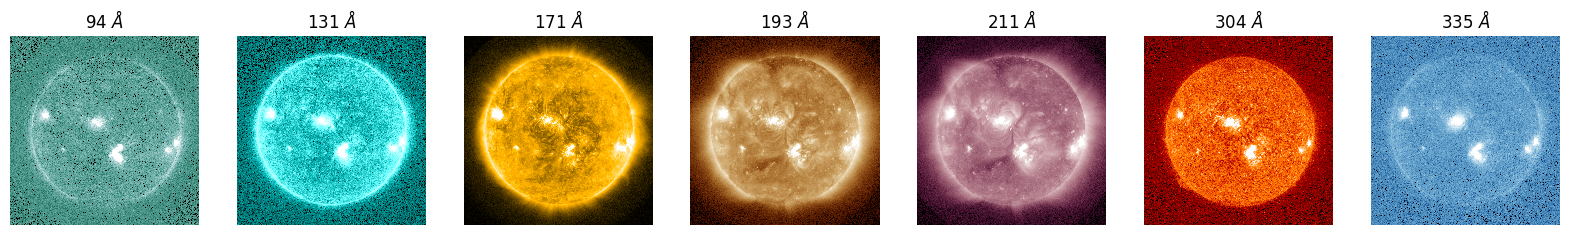

In [ ]:
# Lets use subplot to plot all of the files - you will see the sun in different wavelengths
fig = plt.figure(figsize=(20,30))

ax = fig.add_subplot(1, 7, 1, projection=aia_maps[0])
aia_maps[0].plot(axes=ax, clip_interval=(1,99.5)*u.percent)
ax.set_title('94 $\AA$')
ax.set_axis_off()


ax1 = fig.add_subplot(1, 7, 2, projection=aia_maps[1])
aia_maps[1].plot(axes=ax1, clip_interval=(1,99.5)*u.percent)
ax1.set_title('131 $\AA$')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 7, 3, projection=aia_maps[2])
aia_maps[2].plot(axes=ax2, clip_interval=(1,99.5)*u.percent)
ax2.set_title('171 $\AA$')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 7, 4, projection=aia_maps[3])
aia_maps[3].plot(axes=ax3, clip_interval=(1,99.5)*u.percent)
ax3.set_title('193 $\AA$')
ax3.set_axis_off()

ax4 = fig.add_subplot(1, 7, 5, projection=aia_maps[4])
aia_maps[4].plot(axes=ax4, clip_interval=(1,99.5)*u.percent)
ax4.set_title('211 $\AA$')
ax4.set_axis_off()


ax5 = fig.add_subplot(1, 7, 6, projection=aia_maps[5])
aia_maps[5].plot(axes=ax5, clip_interval=(1,99.5)*u.percent)
ax5.set_title('304 $\AA$')
ax5.set_axis_off()

ax6 = fig.add_subplot(1, 7, 7, projection=aia_maps[6])
aia_maps[6].plot(axes=ax6, clip_interval=(1,99.5)*u.percent)
ax6.set_title('335 $\AA$')
ax6.set_axis_off()
plt.show()



Now lets take a look at the magnetic field data...

In [ ]:
# read in the magnetic field data file using google drive
hmi_file = glob.glob('/content/drive/MyDrive/standrews/practical1/HMI/hmi*.fits')

In [61]:
# Or use this line if you have uploaded the file
hmi_file = glob.glob('hmi*.fits')

In [62]:
hmi_file

['hmi.M_45s.20170904_180515_TAI.2.magnetogram.fits']

In [63]:
# create a map from the file. This time we rotate to make sure it is the right way up
hmi_map = sunpy.map.Map(hmi_file).rotate(order=3)

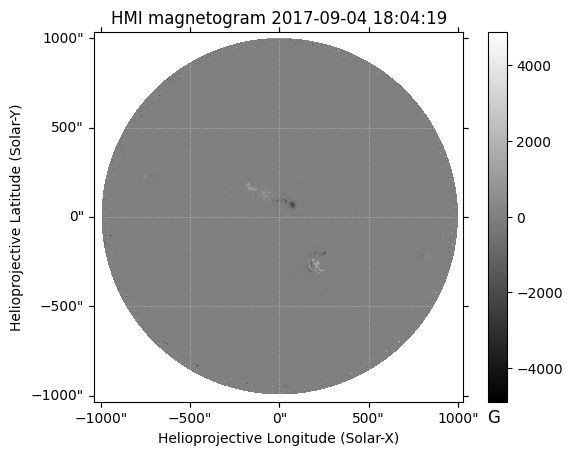

In [64]:
# Lets take a look
hmi_map.peek()

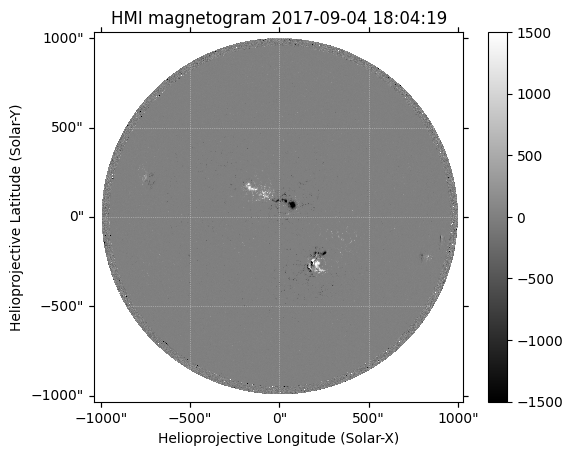

In [66]:
# We can change the maximum and minimum values shown on the plot by using plot_settings
hmi_map.plot_settings['norm'] = plt.Normalize(-1500, 1500)
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_map)
hmi_map.plot(axes=ax)
plt.colorbar()
plt.show()

Lets plot the HMI ontop of the AIA data...

First we need to correct for the time difference of the maps (differential rotation) then we can create submaps of the region of interest


In [67]:
# Lets specify the time and frame we want to rotate the map to - this will be the same time as the aia data
out_time = aia_171.date
out_frame = Helioprojective(observer='earth', obstime=out_time,
                            rsun=hmi_map.coordinate_frame.rsun)


In [68]:
# Next we have to construct a world coordinate system (WCS) object for the output map
out_center = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=out_frame)
header = sunpy.map.make_fitswcs_header(hmi_map.data.shape,
                                       out_center,
                                       scale=u.Quantity(hmi_map.scale))
out_wcs = WCS(header)

In [69]:
# Then we reproject the map from the input to the output frame, this may take a while to load!
with propagate_with_solar_surface():
    hmi_dmap = hmi_map.reproject_to(out_wcs)

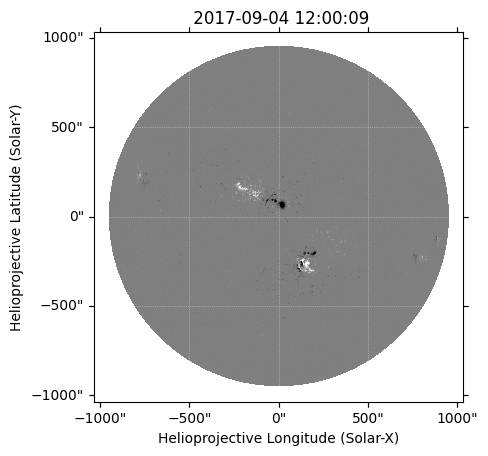

In [70]:
# Plot the rotated map
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_dmap)
hmi_dmap.plot()

In [72]:
# Now we will define a region of interest to plot

bottom_left = [0, -400] * u.arcsec
top_right = [300, -100] * u.arcsec

# map of the data in 171A
aia_smap = aia_171.submap(SkyCoord(*bottom_left, frame=aia_171.coordinate_frame),
                          top_right=SkyCoord(*top_right, frame=aia_171.coordinate_frame))
# map of the magnetic field data
hmi_smap = hmi_dmap.submap(SkyCoord(*bottom_left, frame=hmi_dmap.coordinate_frame),
                          top_right=SkyCoord(*top_right, frame=hmi_dmap.coordinate_frame))


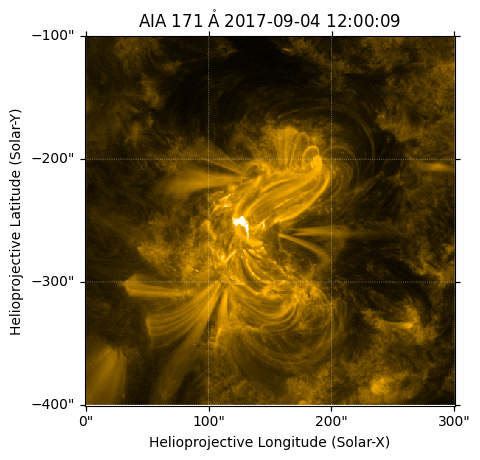

In [73]:
aia_smap.plot()

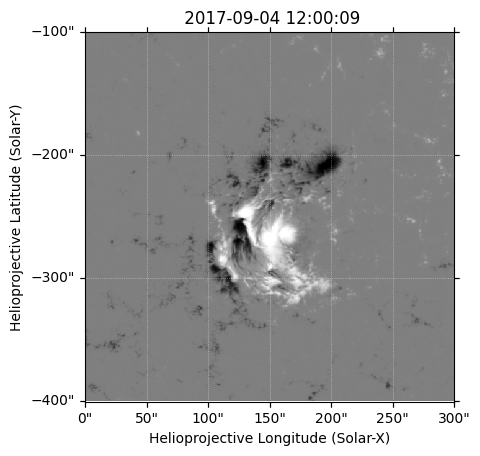

In [74]:
hmi_smap.plot()

In [75]:
# Lets create a composite map that includes both maps
comp_map = sunpy.map.Map(aia_smap, hmi_smap, composite=True)

# Let's set the contours of the HMI map, the second image in our composite map
# (therefore the index is 1), from a few hundred to a thousand Gauss which
# is the typical field associated with active regions.
levels = [-1000, -500, -250, 250, 500, 1000]
comp_map.set_levels(index=1, levels=levels)


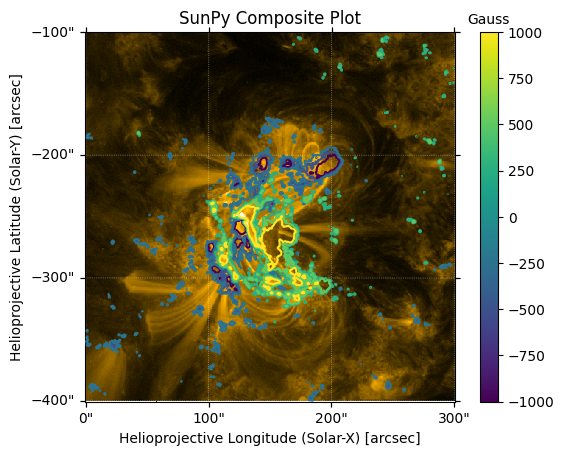

In [ ]:
#Lets plot the composite map
fig = plt.figure()
ax = fig.add_subplot(projection=comp_map.get_map(0))
comp_map.plot(axes=ax)
norm = matplotlib.colors.Normalize(vmin=-1000, vmax=1000)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
cbar.ax.set_title("Gauss", fontsize=10)
plt.show()


# TimeSeries

`Timeseries` consist of 2D data i.e. times and measurements. The underlying structure is a `pandas.Dataframe`.

SunPy TimeSeries supports time-series data from a wide range of instruments. They can be created either manually or from files.

Lets look at an example. This example demonstrates how to the plot the solar cycle in terms of the number of sunspots vs time and also a prediction for the next few years!


The US Space Weather Prediction Center (NOAA/SWPC) proves the solar cycle indicies including sunspot number and predictions on how the sunspot number will evolve. Predicted values are based upon the consensus of the Solar Cycle Prediction Panel, who meet regularly and compare different model results and predictions.

meet regularly to compare model predictions

In [76]:
# Lets first download the data

# define the time range for downloading the data
time_range = TimeRange("2008-06-01 00:00", Time.now())
# search and download the sunspot number data between the time range
result = Fido.search(a.Time(time_range), a.Instrument('noaa-indices'))
f_noaa_indices = Fido.fetch(result)
# search and download the prediction of the sunspot number that have been made
result = Fido.search(a.Time(time_range.end, time_range.end + TimeDelta(4 * u.year)),
                     a.Instrument('noaa-predict'))
f_noaa_predict = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

observed-solar-cycle-indices.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f8445d4f2e0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/base_events.py", line 695, in __del__
    self.close()
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.11/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

predicted-solar-cycle.json: 0.00B [00:00, ?B/s]

In [78]:
# Next we load the data into individual time series objects (one for the indicies and one for the prediction)

noaa = ts.TimeSeries(f_noaa_indices, source='noaaindices').truncate(time_range)
noaa_predict = ts.TimeSeries(f_noaa_predict, source='noaapredictindices')

/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 144 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 2 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.11/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 2 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


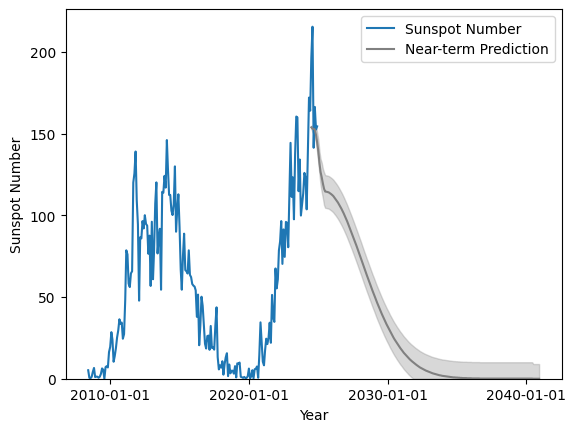

In [79]:
# Finally we can plot the sunspot number and the NOAA prediction. The predictions provide both a high and low values, which we plot below as ranges.

time_support()
fig, ax = plt.subplots()
# plot the sunspot number
ax.plot(noaa.time, noaa.quantity('sunspot RI'), label='Sunspot Number')
# plot the prediction of sunspot number
ax.plot(noaa_predict.time, noaa_predict.quantity('sunspot'), color='grey', label='Near-term Prediction')
# shade the lower and higher limits of predicted sunspot number
ax.fill_between(
    noaa_predict.time, noaa_predict.quantity('sunspot low'),
    noaa_predict.quantity('sunspot high'), alpha=0.3, color='grey'
)
# set the limit of the y axis to 0
ax.set_ylim(bottom=0)
# label the y axis
ax.set_ylabel('Sunspot Number')
# label the x axis
ax.set_xlabel('Year')
# show a legend
ax.legend()

plt.show()

The solar cycle data is the longest recorded dataset in solar physics. See how far back you can go! What do you notice?